# Import Dependencies and data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dữ liệu
df = pd.read_csv('job_data_cleaned.csv')

# Kiểm tra thông tin cơ bản
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STT                  717 non-null    int64  
 1   Trang thu thập       717 non-null    object 
 2   Tên công ty          717 non-null    object 
 3   Vị trí ứng tuyển     717 non-null    object 
 4   Yêu cầu bằng cấp     717 non-null    object 
 5   Yêu cầu kinh nghiệm  717 non-null    int64  
 6   Địa điểm             716 non-null    object 
 7   Ngày đăng tuyển      717 non-null    object 
 8   Lương tối thiểu      717 non-null    float64
 9   Lương tối đa         717 non-null    float64
 10  Lương TB             717 non-null    float64
 11  Tên công việc        717 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 67.3+ KB
None
   STT Trang thu thập                        Tên công ty Vị trí ứng tuyển  \
0    0     CareerLink     CÔNG TY CỔ PHẦN KINH DOA

# Data Preprocessing


In [13]:
# Loại bỏ các cột không cần thiết
job_data_cleaned = df.drop(columns=['STT'])

# Chuyển đổi cột 'Ngày đăng tuyển' thành định dạng datetime
job_data_cleaned['Ngày đăng tuyển'] = pd.to_datetime(job_data_cleaned['Ngày đăng tuyển'], errors='coerce')

# Kiểm tra giá trị thiếu trong dữ liệu
missing_values = job_data_cleaned.isnull().sum()

job_data_cleaned.info(), missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Trang thu thập       717 non-null    object        
 1   Tên công ty          717 non-null    object        
 2   Vị trí ứng tuyển     717 non-null    object        
 3   Yêu cầu bằng cấp     717 non-null    object        
 4   Yêu cầu kinh nghiệm  717 non-null    int64         
 5   Địa điểm             716 non-null    object        
 6   Ngày đăng tuyển      717 non-null    datetime64[ns]
 7   Lương tối thiểu      717 non-null    float64       
 8   Lương tối đa         717 non-null    float64       
 9   Lương TB             717 non-null    float64       
 10  Tên công việc        717 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 61.7+ KB


(None,
 Trang thu thập         0
 Tên công ty            0
 Vị trí ứng tuyển       0
 Yêu cầu bằng cấp       0
 Yêu cầu kinh nghiệm    0
 Địa điểm               1
 Ngày đăng tuyển        0
 Lương tối thiểu        0
 Lương tối đa           0
 Lương TB               0
 Tên công việc          0
 dtype: int64)

# Correlation Analysis

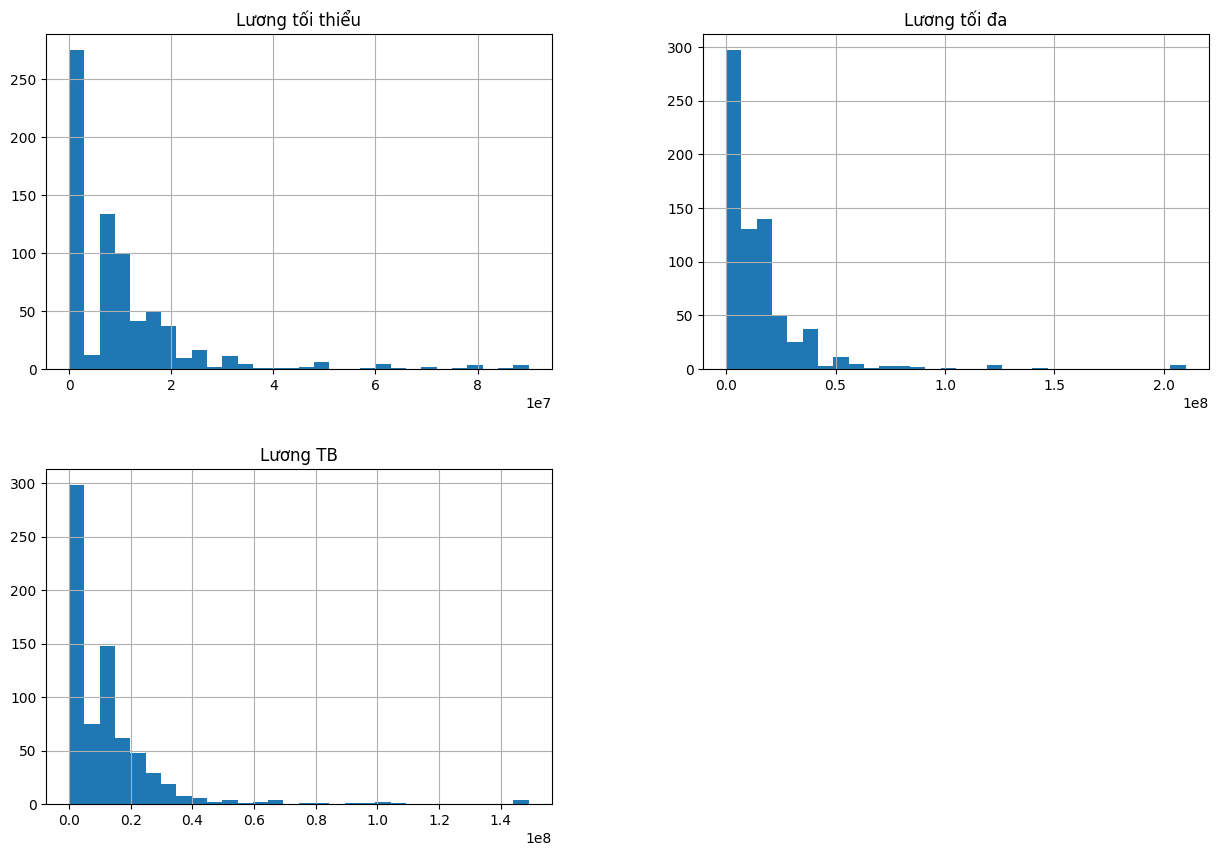

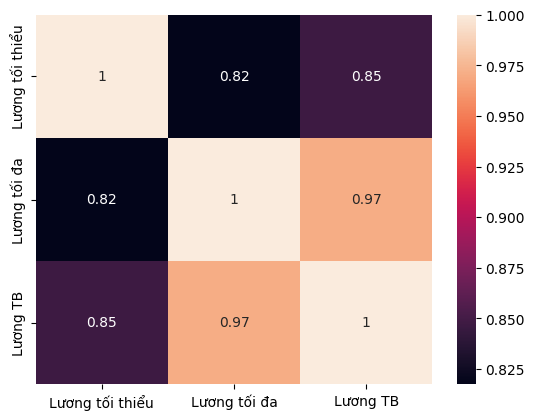

In [14]:
# Phân phối của các cột số
df[['Lương tối thiểu', 'Lương tối đa', 'Lương TB']].hist(bins=30, figsize=(15, 10))
plt.show()

# Tương quan giữa các cột số
sns.heatmap(df[['Lương tối thiểu', 'Lương tối đa', 'Lương TB']].corr(), annot=True)
plt.show()

In [15]:
# Tính toán ma trận tương quan
corr_matrix = df[['Yêu cầu kinh nghiệm', 'Lương tối thiểu', 'Lương tối đa', 'Lương TB']].corr()


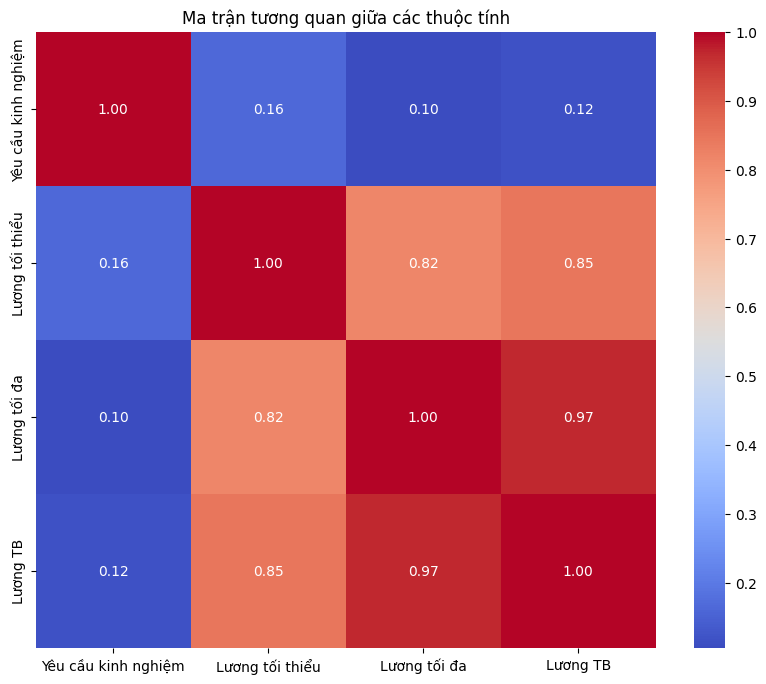

In [16]:
# Vẽ heatmap để trực quan hóa ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.show()

### Phân tích từ heatmap:

Yêu cầu bằng cấp và Lương TB: Nếu hệ số tương quan dương và cao, điều này cho thấy bằng cấp cao hơn có xu hướng liên quan đến mức lương cao hơn.

Yêu cầu kinh nghiệm và Lương TB: Nếu hệ số tương quan dương và cao, điều này cho thấy kinh nghiệm nhiều hơn có xu hướng liên quan đến mức lương cao hơn.

Vị trí ứng tuyển và Lương TB: Nếu hệ số tương quan dương, điều này cho thấy một số vị trí có xu hướng được trả lương cao hơn.

### Kết luận
Bằng cấp: Nếu hệ số tương quan dương và cao, điều này cho thấy bằng cấp cao hơn có xu hướng liên quan đến mức lương cao hơn.

Kinh nghiệm: Nếu hệ số tương quan dương và cao, điều này cho thấy kinh nghiệm nhiều hơn có xu hướng liên quan đến mức lương cao hơn.

Vị trí ứng tuyển: Một số vị trí có thể được trả lương cao hơn so với các vị trí khác.

## Feature Extraction

In [17]:
# Chuyển đổi các cột phân loại thành dạng số
df['Yêu cầu bằng cấp'] = df['Yêu cầu bằng cấp'].astype('category').cat.codes
df['Yêu cầu kinh nghiệm'] = df['Yêu cầu kinh nghiệm'].astype('category').cat.codes
df['Vị trí ứng tuyển'] = df['Vị trí ứng tuyển'].astype('category').cat.codes

# Thêm các đặc trưng mới (ví dụ: chênh lệch lương)
df['Chênh lệch lương'] = df['Lương tối đa'] - df['Lương tối thiểu']